# Bag-of-Words

A bag-of-words model, or BoW for short, is a way of extracting features from text for use in
modeling, such as with machine learning algorithms. The approach is very simple and 
exible,
and can be used in a myriad of ways for extracting features from documents. A bag-of-words is
a representation of text that describes the occurrence of words within a document. It involves
two things:
 A vocabulary of known words.
 A measure of the presence of known words.
It is called a bag-of-words , because any information about the order or structure of words
in the document is discarded. The model is only concerned with whether known words occur in
the document, not where in the document.

The intuition is that documents are similar if they have similar content. Further, that from
the content alone we can learn something about the meaning of the document.

### Step 1: Collect Data
### Step 2: Design the Vocabulary
### Step 3: Create Document Vectors

### Movie Review Polarity Dataset (review polarity.tar.gz, 3MB).

https://raw.githubusercontent.com/jbrownlee/Datasets/master/review_polarity.
tar.gz

# Managing Vocabulary

As the vocabulary size increases, so does the vector representation of documents. In the previous
example, the length of the document vector is equal to the number of known words. You can
imagine that for a very large corpus, such as thousands of books, that the length of the vector
might be thousands or millions of positions. Further, each document may contain very few of
the known words in the vocabulary.

This results in a vector with lots of zero scores, called a sparse vector or sparse representation.
Sparse vectors require more memory and computational resources when modeling and the
vast number of positions or dimensions can make the modeling process very challenging for
traditional algorithms. As such, there is pressure to decrease the size of the vocabulary when
using a bag-of-words model.

There are simple text cleaning techniques that can be used as a first step, such as:

 Ignoring case.

 Ignoring punctuation.

 Ignoring frequent words that don't contain much information, called stop words, like a, of,
etc.

 Fixing misspelled words.

 Reducing words to their stem (e.g. play from playing) using stemming algorithms.

A more sophisticated approach is to create a vocabulary of grouped words. This both
changes the scope of the vocabulary and allows the bag-of-words to capture a little bit more
meaning from the document. In this approach, each word or token is called a gram. Creating a
vocabulary of two-word pairs is, in turn, called a bigram model.

An n-gram is an n-token sequence of words: a 2-gram (more commonly called a
bigram) is a two-word sequence of words like \please turn", \turn your", or \your
homework", and a 3-gram (more commonly called a trigram) is a three-word sequence
of words like \please turn your", or \turn your homework".


| Page 85, Speech and Language Processing, 2009.

# Scoring Words
Once a vocabulary has been chosen, the occurrence of words in example documents needs to be
scored. In the worked example, we have already seen one very simple approach to scoring: a
binary scoring of the presence or absence of words. Some additional simple scoring methods
include:
    
 Counts. Count the number of times each word appears in a document.

 Frequencies. Calculate the frequency that each word appears in a document out of all
the words in the document.



### Word Hashing
We can use a hash representation of known words in our vocabulary. This addresses the problem of having a very large vocabulary
for a large text corpus because we can choose the size of the hash space, which is in turn the
size of the vector representation of the document.

Words are hashed deterministically to the same integer index in the target hash space. A
binary score or count can then be used to score the word. This is called the hash trick or feature
hashing. The challenge is to choose a hash space to accommodate the chosen vocabulary size to
minimize the probability of collisions and trade-of sparsity.




### Limitations of Bag-of-Words


## TF-IDF
A problem with scoring word frequency is that highly frequent words start to dominate in the
document (e.g. larger score), but may not contain as much informational content to the model
as rarer but perhaps domain specific words. One approach is to rescale the frequency of words
by how often they appear in all documents, so that the scores for frequent words like the that
are also frequent across all documents are penalized. This approach to scoring is called Term
Frequency - Inverse Document Frequency, or TF-IDF for short, where:
    
 Term Frequency: is a scoring of the frequency of the word in the current document.
    
 Inverse Document Frequency: is a scoring of how rare the word is across documents.
    
The scores are a weighting where not all words are equally as important or interesting. The
scores have the effect of highlighting words that are distinct (contain useful information) in a
given document. Thus the idf of a rare term is high, whereas the idf of a frequent term is likely to be
low.
| Page 118, An Introduction to Information Retrieval, 2008. 


### Limitations of Bag-of-Words
The bag-of-words model is very simple to understand and implement and oers a lot of 
exibility
for customization on your specific text data. It has been used with great success on prediction
problems like language modeling and documentation classication. Nevertheless, it suers from
some shortcomings, such as:

 Vocabulary: The vocabulary requires careful design, most specifically in order to manage
the size, which impacts the sparsity of the document representations.

 Sparsity: Sparse representations are harder to model both for computational reasons
(space and time complexity) and also for information reasons, where the challenge is for
the models to harness so little information in such a large representational space.

 Meaning: Discarding word order ignores the context, and in turn meaning of words in
the document (semantics). Context and meaning can offer a lot to the model, that if
modeled could tell the dierence between the same words differently arranged (this is
interesting vs is this interesting), synonyms (old bike vs used bike), and much more.

# Develop a Neural Bag-of-Words Model for Sentiment Analysis


1. Movie Review Dataset
2. Data Preparation
3. Bag-of-Words Representation
4. Sentiment Analysis Models
5. Comparing Word Scoring Methods
6. Predicting Sentiment for New Reviews

## Define a Vocabulary

It is important to define a vocabulary of known words when using a bag-of-words model. The
more words, the larger the representation of documents, therefore it is important to constrain
the words to only those believed to be predictive. This is difficult to know beforehand and often
it is important to test different hypotheses about how to construct a useful vocabulary. We
have already seen how we can remove punctuation and numbers from the vocabulary in the
previous section. 

We can repeat this for all documents and build a set of all known words.


We can develop a vocabulary as a Counter, which is a dictionary mapping of words and
their count that allows us to easily update and query. 


Each document can be added to the counter (a new function called add doc to vocab()) and we can step over all of the reviews in the negative directory and then the positive directory (a new function called process docs()).

In [1]:
from nltk.corpus import stopwords
import string
import re
import string
import re
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens
# load the document
filename = 'txt_sentoken/pos/cv000_29590.txt'
text = load_doc(filename)
tokens = clean_doc(text)
print(tokens)

['films', 'adapted', 'comic', 'books', 'plenty', 'success', 'whether', 'theyre', 'superheroes', 'batman', 'superman', 'spawn', 'geared', 'toward', 'kids', 'casper', 'arthouse', 'crowd', 'ghost', 'world', 'theres', 'never', 'really', 'comic', 'book', 'like', 'hell', 'starters', 'created', 'alan', 'moore', 'eddie', 'campbell', 'brought', 'medium', 'whole', 'new', 'level', 'mid', 'series', 'called', 'watchmen', 'say', 'moore', 'campbell', 'thoroughly', 'researched', 'subject', 'jack', 'ripper', 'would', 'like', 'saying', 'michael', 'jackson', 'starting', 'look', 'little', 'odd', 'book', 'graphic', 'novel', 'pages', 'long', 'includes', 'nearly', 'consist', 'nothing', 'footnotes', 'words', 'dont', 'dismiss', 'film', 'source', 'get', 'past', 'whole', 'comic', 'book', 'thing', 'might', 'find', 'another', 'stumbling', 'block', 'hells', 'directors', 'albert', 'allen', 'hughes', 'getting', 'hughes', 'brothers', 'direct', 'seems', 'almost', 'ludicrous', 'casting', 'carrot', 'top', 'well', 'anythi

In [2]:
# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
    # load doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # update counts
    vocab.update(tokens)
    
# load all docs in a directory
def process_docs(directory, vocab):
    # walk through all files in the folder
    for filename in listdir(directory):
    # skip any reviews in the test set
        if filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # add doc to vocab
        add_doc_to_vocab(path, vocab)
    
# save list to file
def save_list(lines, filename):
    # convert lines to a single blob of text
    data = '\n'.join(lines)
    # open file
    file = open(filename, 'w')
    # write text
    file.write(data)
    # close file
    file.close()
# define vocab
vocab = Counter()
# add all docs to vocab
process_docs('txt_sentoken/pos', vocab)
process_docs('txt_sentoken/neg', vocab)
# print the size of the vocab
print(len(vocab))
# keep tokens with a min occurrence
min_occurrence = 2
tokens = [k for k,c in vocab.items() if c >= min_occurrence]
print(len(tokens))
# save tokens to a vocabulary file
save_list(tokens, 'vocab.txt')

44276
25767


## Comparing Word Scoring Methods
The texts to matrix() function for the Tokenizer in the Keras API provides 4 dierent
methods for scoring words; they are:

 Binary Where words are marked as present (1) or absent (0)

 Count Where the occurrence count for each word is marked as an integer

 TFIDF Where each word is scored based on their frequency, where words that are common
across all documents are penalized

 FREQ Where words are scored based on their frequency of occurrence within the document.

In [5]:
import string
import re
from os import listdir
from numpy import array
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras import backend as k
import tensorflow as tf
import pandas as pd
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)


def process_docs(directory, vocab, is_train):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load and clean the doc
        line = doc_to_line(path, vocab)
        # add to list
        lines.append(line)
    return lines

# load and clean a dataset
def load_clean_dataset(vocab, is_train):
    # load documents
    neg = process_docs('txt_sentoken/neg', vocab, is_train)
    pos = process_docs('txt_sentoken/pos', vocab, is_train)
    docs = neg + pos
    # prepare labels
    labels = array([0 for _ in range(len(neg))] + [1 for _ in range(len(pos))])
    return docs, labels

# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

# load and clean a dataset
def load_clean_dataset(vocab, is_train):
    # load documents
    neg = process_docs('txt_sentoken/neg', vocab, is_train)
    pos = process_docs('txt_sentoken/pos', vocab, is_train)
    docs = neg + pos
    # prepare labels
    labels = array([0 for _ in range(len(neg))] + [1 for _ in range(len(pos))])
    return docs, labels

# define the model
def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(50, input_shape=(n_words,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
#     plot_model(model, to_file='model.png', show_shapes=True)
    tf.keras.utils.plot_model(
        model, to_file='model.png', show_shapes=True)
    return model


# evaluate a neural network model
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
    scores = list()
    n_repeats = 10
    n_words = Xtest.shape[1]
    for i in range(n_repeats):
        # define network
        model = define_model(n_words)
        # fit network
        model.fit(Xtrain, ytrain, epochs=10, verbose=0)
        # evaluate
        _, acc = model.evaluate(Xtest, ytest, verbose=0)
        scores.append(acc)
        print('%d accuracy: %s' % ((i+1), acc))
    return scores
# prepare bag of words encoding of docs
def prepare_data(train_docs, test_docs, mode):
    # create the tokenizer
    tokenizer = Tokenizer()
    # fit the tokenizer on the documents
    tokenizer.fit_on_texts(train_docs)
    # encode training data set
    Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
    # encode training data set
    Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
    return Xtrain, Xtest

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 50)                1288450   
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 51        
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________
1 accuracy: 0.925
Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 50)                1288450   
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 51        
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
__________________________________________________________

3 accuracy: 0.905
Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 50)                1288450   
_________________________________________________________________
dense_109 (Dense)            (None, 1)                 51        
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________
4 accuracy: 0.905
Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            (None, 50)                1288450   
_________________________________________________________________
dense_111 (Dense)            (None, 1)                 51        
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
________________________________________

6 accuracy: 0.875
Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_134 (Dense)            (None, 50)                1288450   
_________________________________________________________________
dense_135 (Dense)            (None, 1)                 51        
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________
7 accuracy: 0.895
Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_136 (Dense)            (None, 50)                1288450   
_________________________________________________________________
dense_137 (Dense)            (None, 1)                 51        
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
________________________________________

9 accuracy: 0.87
Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_160 (Dense)            (None, 50)                1288450   
_________________________________________________________________
dense_161 (Dense)            (None, 1)                 51        
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________
10 accuracy: 0.85
          binary      count      tfidf       freq
count  10.000000  10.000000  10.000000  10.000000
mean    0.930500   0.898500   0.876000   0.866000
std     0.004972   0.005798   0.013292   0.008433
min     0.925000   0.890000   0.850000   0.850000
25%     0.926250   0.895000   0.871250   0.861250
50%     0.930000   0.900000   0.880000   0.870000
75%     0.933750   0.903750   0.880000   0.870000
max     0.940000   0.905000   0.895000   0.875000


NameError: name 'pyplot' is not defined

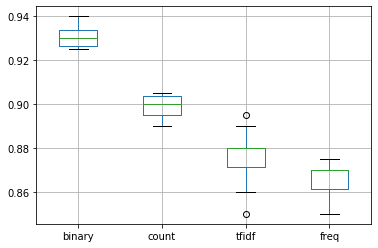

In [7]:
# load the vocabulary
import tensorflow as tf
tf.compat.v1.get_default_graph()
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())
# load all reviews
train_docs, ytrain = load_clean_dataset(vocab, True)
test_docs, ytest = load_clean_dataset(vocab, False)
# run experiment
modes = ['binary', 'count', 'tfidf', 'freq']
results = pd.DataFrame()
for mode in modes:
    # prepare data for mode
    Xtrain, Xtest = prepare_data(train_docs, test_docs, mode)
    # evaluate model on data for mode
    results[mode] = evaluate_mode(Xtrain, ytrain, Xtest, ytest)
# summarize results
print(results.describe())
# plot results
results.boxplot()
import matplotlib.pyplot as plt
pyplot.show()

          binary      count      tfidf       freq
count  10.000000  10.000000  10.000000  10.000000
mean    0.930500   0.898500   0.876000   0.866000
std     0.004972   0.005798   0.013292   0.008433
min     0.925000   0.890000   0.850000   0.850000
25%     0.926250   0.895000   0.871250   0.861250
50%     0.930000   0.900000   0.880000   0.870000
75%     0.933750   0.903750   0.880000   0.870000
max     0.940000   0.905000   0.895000   0.875000


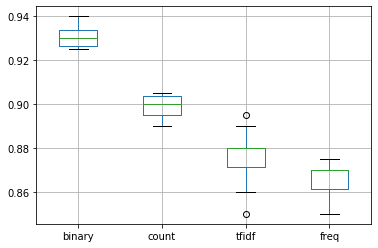

In [10]:

from matplotlib import pyplot
print(results.describe())
# plot results
results.boxplot()
pyplot.show()

### Prediction on new movie

In [25]:
import string
import re
from os import listdir
from numpy import array
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens
    
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

# load all docs in a directory
def process_docs(directory, vocab):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # create the full path of the file to open
        path = directory + '/' + filename
        # load and clean the doc
        line = doc_to_line(path, vocab)
        # add to list
        lines.append(line)
    return lines
    
# load and clean a dataset
def load_clean_dataset(vocab):
    # load documents
    neg = process_docs('txt_sentoken/neg', vocab)
    pos = process_docs('txt_sentoken/pos', vocab)
    docs = neg + pos
    # prepare labels
    labels = array([0 for _ in range(len(neg))] + [1 for _ in range(len(pos))])
    return docs, labels
    
# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

# define the model
def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(50, input_shape=(n_words,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
#     tf.utils.plot_model(model, to_file='model.png', show_shapes=True)
    tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)
    return model

# classify a review as negative or positive
def predict_sentiment(review, vocab, tokenizer, model):
    # clean
    tokens = clean_doc(review)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    # convert to line
    line = ' '.join(tokens)
    # encode
    encoded = tokenizer.texts_to_matrix([line], mode='binary')
    # predict sentiment
    yhat = model.predict(encoded, verbose=0)
    # retrieve predicted percentage and label
    percent_pos = yhat[0,0]
    if round(percent_pos) == 0:
        return (1-percent_pos), 'NEGATIVE'
    return percent_pos, 'POSITIVE'

# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

# load all reviews
train_docs, ytrain = load_clean_dataset(vocab)
test_docs, ytest = load_clean_dataset(vocab)

# create the tokenizer
tokenizer = create_tokenizer(train_docs)

# encode data
Xtrain = tokenizer.texts_to_matrix(train_docs, mode='binary')
Xtest = tokenizer.texts_to_matrix(test_docs, mode='binary')

# define network
n_words = Xtrain.shape[1]
model = define_model(n_words)

# fit network
model.fit(Xtrain, ytrain, epochs=10, verbose=2)

# test positive text
text = 'Best movie ever! It was great, I recommend it.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))

# test negative text
text = 'This is a bad movie.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))

Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_166 (Dense)            (None, 50)                1288450   
_________________________________________________________________
dense_167 (Dense)            (None, 1)                 51        
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________
Train on 2000 samples
Epoch 1/10
2000/2000 - 1s - loss: 0.4558 - accuracy: 0.7800
Epoch 2/10
2000/2000 - 1s - loss: 0.0507 - accuracy: 0.9955
Epoch 3/10
2000/2000 - 1s - loss: 0.0127 - accuracy: 1.0000
Epoch 4/10
2000/2000 - 1s - loss: 0.0054 - accuracy: 1.0000
Epoch 5/10
2000/2000 - 1s - loss: 0.0029 - accuracy: 1.0000
Epoch 6/10
2000/2000 - 1s - loss: 0.0018 - accuracy: 1.0000
Epoch 7/10
2000/2000 - 1s - loss: 0.0013 - accuracy: 1.0000
Epoch 8/10
2000/2000 - 1s - loss: 9.3082e-04 - accuracy: 1.0000

# Next steps...

Manage Vocabulary. Explore using a larger or smaller vocabulary. Perhaps you can
get better performance with a smaller set of words.

 **Tune the Network Topology**. Explore alternate network topologies such as deeper or
wider networks. Perhaps you can get better performance with a more suited network.

 **Use Regularization**. Explore the use of regularization techniques, such as dropout.
Perhaps you can delay the convergence of the model and achieve better test set performance.


**More Data Cleaning**. Explore more or less cleaning of the review text and see how it
impacts the model skill.

 **Training Diagnostics**. Use the test dataset as a validation dataset during training and
create plots of train and test loss. Use these diagnostics to tune the batch size and number
of training epochs.

 **Trigger Words**. Explore whether there are specic words in reviews that are highly
predictive of the sentiment.

 **Use Bigrams**. Prepare the model to score bigrams of words and evaluate the performance
under different scoring schemes.

 **Truncated Reviews**. Explore how using a truncated version of the movie reviews results
impacts model skill, try truncating the start, end and middle of reviews.

 **Ensemble Models**. Create models with dierent word scoring schemes and see if using
ensembles of the models results in improves to model skill.

 **Real Reviews**. Train a final model on all data and evaluate the model on real movie
reviews taken from the internet.

In [27]:
### https://www.kaggle.com/derrelldsouza/imdb-sentiment-analysis-eda-ml-lstm-bert